<a href="https://colab.research.google.com/github/yaqianhe/GIA/blob/main/Exercise10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 10
In this exercise, you will plot the land cover of Arkansas in summer and fall 2004. You will need to 

(1) Download the AR land cover data from the link: http://gis.arkansas.gov/ (10 points)

(2) View data characters (10 points)

(3) Plot maps for both land cover together (15 points)

(4) Plot histogram for both land cover together (15 points)

(5) Substract the map to investigate land cover changes during Summer and Fall in 2004.

## Please submit your code through Blackboard.

In [ ]:
# This is the example code for your reference. You need to generate your own script.

# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
#!pip uninstall geopandas
import geopandas as gpd
!pip install rioxarray
import rioxarray as rxr
import xarray as xr
!pip install earthpy
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em
from shapely.geometry import mapping
from rasterio.crs import CRS
from rasterio.plot import plotting_extent
import rasterio as rio
from glob import glob

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (442 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

In [ ]:
# read the data
# as I built the script in Colab, I need to mount my google drive
# You do not need to do this step, as you use the Anaconda Jupyter Notebook
from google.colab import drive
drive.mount('/content/drive/')

# !!!Change the path for your data
summer_path='/content/drive/My Drive/Colab Notebooks/GIA_2021Spring/LULC_SUMMER_CAST2004/LULC_SUMMER_CAST2004.tif'
fall_path='/content/drive/My Drive/Colab Notebooks/GIA_2021Spring/LULC_FALL_CAST2004/LULC_FALL_CAST2004.tif'
summer_lulc_arr = rxr.open_rasterio(summer_path, masked=True).squeeze()
fall_lulc_arr = rxr.open_rasterio(fall_path, masked=True).squeeze()

Mounted at /content/drive/


In [ ]:
# check data structure
summer_lulc_arr

<xarray.DataArray (y: 13698, x: 15709)>
[215181882 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 3.551e+05 3.551e+05 ... 8.027e+05 8.028e+05
  * y            (y) float64 4.043e+06 4.043e+06 ... 3.653e+06 3.653e+06
    spatial_ref  int64 0
Attributes:
    RepresentationType:  THEMATIC
    STATISTICS_MAXIMUM:  210
    STATISTICS_MEAN:     99.930605570222
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   73.516876953625
    scale_factor:        1.0
    add_offset:          0.0

In [ ]:
# check data structure
fall_lulc_arr

<xarray.DataArray (y: 13698, x: 15709)>
[215181882 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 3.551e+05 3.551e+05 ... 8.027e+05 8.028e+05
  * y            (y) float64 4.043e+06 4.043e+06 ... 3.653e+06 3.653e+06
    spatial_ref  int64 0
Attributes:
    RepresentationType:  THEMATIC
    STATISTICS_MAXIMUM:  210
    STATISTICS_MEAN:     100.09680726744
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   74.472818044277
    scale_factor:        1.0
    add_offset:          0.0

In [ ]:
# check shape of land cover data
print(summer_lulc_arr.shape,fall_lulc_arr.shape)

(13698, 15709) (13698, 15709)


In [ ]:
# View the Coordinate Reference System (CRS), spatial extent, resolution, number of bands
print("The CRS for summer lclu is:", summer_lulc_arr.rio.crs, "The CRS for fall lclu is:", fall_lulc_arr.rio.crs)
print("The spatial extent for summer lclu is:", summer_lulc_arr.rio.bounds(),"The spatial extent for fall lclu is:", fall_lulc_arr.rio.bounds())
print("The spatial resolution for summer lclu is:", summer_lulc_arr.rio.resolution(), "The spatial resolution for fall lclu is:", fall_lulc_arr.rio.resolution())
print("The metadata for summer lclu is:", summer_lulc_arr.attrs, "The metadata for fall lclu is:", fall_lulc_arr.attrs)
print("Number of bands for summer lcluc is ", summer_lulc_arr.rio.count, "Number of bands for fall lcluc is ", fall_lulc_arr.rio.count)

The CRS for summer lclu is: EPSG:26915 The CRS for fall lclu is: EPSG:26915
The spatial extent for summer lclu is: (355081.5, 3652560.0, 802788.0, 4042953.0) The spatial extent for fall lclu is: (355081.5, 3652560.0, 802788.0, 4042953.0)
The spatial resolution for summer lclu is: (28.5, -28.5) The spatial resolution for fall lclu is: (28.5, -28.5)
The metadata for summer lclu is: {'RepresentationType': 'THEMATIC', 'STATISTICS_MAXIMUM': 210, 'STATISTICS_MEAN': 99.930605570222, 'STATISTICS_MINIMUM': 0, 'STATISTICS_STDDEV': 73.516876953625, 'scale_factor': 1.0, 'add_offset': 0.0} The metadata for fall lclu is: {'RepresentationType': 'THEMATIC', 'STATISTICS_MAXIMUM': 210, 'STATISTICS_MEAN': 100.09680726744, 'STATISTICS_MINIMUM': 0, 'STATISTICS_STDDEV': 74.472818044277, 'scale_factor': 1.0, 'add_offset': 0.0}
Number of bands for summer lcluc is  1 Number of bands for fall lcluc is  1


In [ ]:
# View no data value
print("The no data value for summer lclu is:", summer_lulc_arr.rio.nodata)

The no data value for summer lclu is: nan


In [ ]:
# View no data value
print("The no data value for fall lclu is:", fall_lulc_arr.rio.nodata)

The no data value for fall lclu is: nan


In [ ]:
# View minimum and maximum value
print("The minimum raster value is: ", np.nanmin(summer_lulc_arr.data))
print("The maximum raster value is: ", np.nanmax(summer_lulc_arr.data))

The minimum raster value is:  0.0
The maximum raster value is:  210.0


In [ ]:
# View minimum and maximum value
print("The minimum raster value is: ", np.nanmin(fall_lulc_arr.data))
print("The maximum raster value is: ", np.nanmax(fall_lulc_arr.data))

The minimum raster value is:  0.0
The maximum raster value is:  210.0


In [ ]:
# Prepare path to stack the data
lclu_path=[summer_path,fall_path]
lclu_path

['/content/drive/My Drive/Colab Notebooks/GIA_2021Spring/LULC_SUMMER_CAST2004/LULC_SUMMER_CAST2004.tif',
 '/content/drive/My Drive/Colab Notebooks/GIA_2021Spring/LULC_FALL_CAST2004/LULC_FALL_CAST2004.tif']

In [ ]:
# Stacked lclu data
lclu_data, land_meta = es.stack(lclu_path)
lclu_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

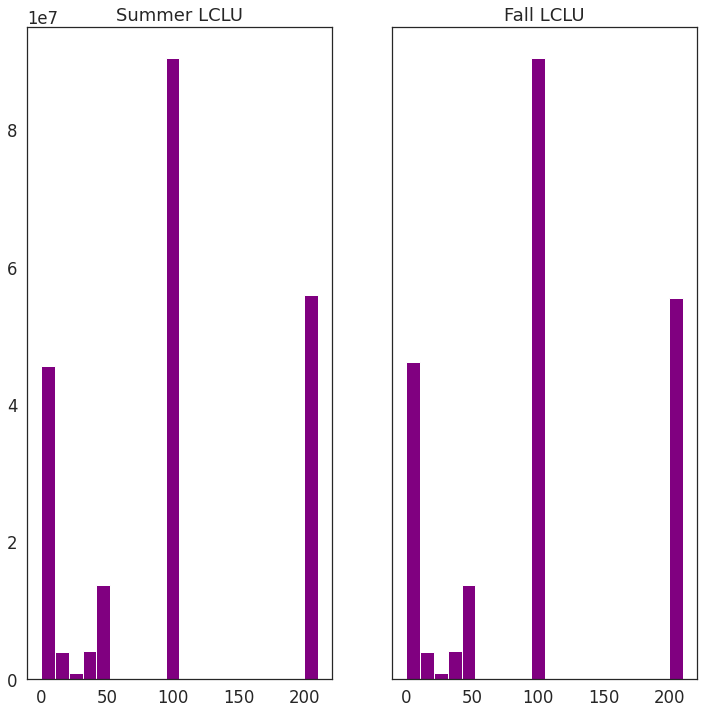

In [ ]:
# Plot all histograms using earthpy
band_titles = ["Summer LCLU", "Fall LCLU"]

ep.hist(lclu_data,
        title=band_titles)

plt.show()

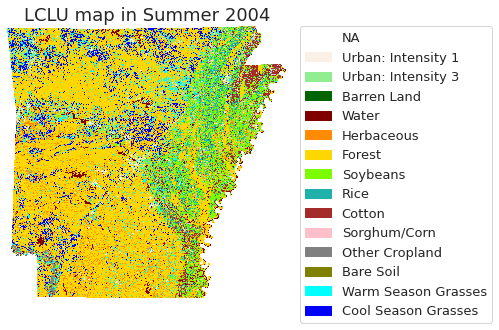

In [ ]:
# Add legend of LCLU classes
# Create a list of labels to use for your legend
#0: NA
#11 Urban: Intensity 1 13 Urban: Intensity 3
#31 Barren Land 41 Water 51 Herbaceous/Woody/Transitional 100 Forest Unclassified
#201 Soybeans 202 Rice 203 Cotton 204 Wheat/Oats 205 Sorghum/Corn 206 Other Cropland 
#208 Bare Soil/Seedbed 209 Warm Season Grasses 210 Cool Season Grasses
class_labels = ["NA","Urban: Intensity 1","Urban: Intensity 3","Barren Land",
                "Water","Herbaceous","Forest","Soybeans","Rice","Cotton",
                "Sorghum/Corn","Other Cropland","Bare Soil","Warm Season Grasses",
                "Cool Season Grasses"]

# Create a colormap from a list of colors
colors = ['white','linen','lightgreen','darkgreen','maroon',"darkorange", "gold", "lawngreen", "lightseagreen",
          "brown","pink","grey","olive","cyan","blue"]

cmap = ListedColormap(colors)

class_bins = [0, 11, 13, 31,41,51,100,201,202,203,205,206,208,209,210,220]
norm = BoundaryNorm(class_bins,
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(5, 5))
im = summer_lulc_arr.plot.imshow(cmap=cmap,
                                        norm=norm,
                                        # Turn off colorbar
                                        add_colorbar=False)
# Add legend using earthpy
ep.draw_legend(im,
               titles=class_labels)
ax.set(title="LCLU map in Summer 2004")
ax.set_axis_off()
plt.show()

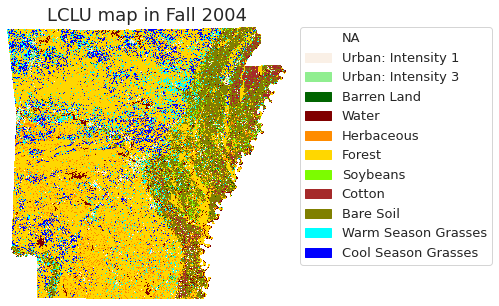

In [ ]:
# Add legend of LCLU classes
# Create a list of labels to use for your legend
#0: NA
#11 Urban: Intensity 1 13 Urban: Intensity 3
#31 Barren Land 41 Water 51 Herbaceous/Woody/Transitional 100 Forest Unclassified
#201 Soybeans 202 Rice 203 Cotton 204 Wheat/Oats 205 Sorghum/Corn 206 Other Cropland 
#208 Bare Soil/Seedbed 209 Warm Season Grasses 210 Cool Season Grasses
class_labels = ["NA","Urban: Intensity 1","Urban: Intensity 3","Barren Land",
                "Water","Herbaceous","Forest","Soybeans","Cotton",
                "Bare Soil","Warm Season Grasses",
                "Cool Season Grasses"]

# Create a colormap from a list of colors
colors = ['white','linen','lightgreen','darkgreen','maroon',"darkorange", "gold", "lawngreen",
          "brown","olive","cyan","blue"]

cmap = ListedColormap(colors)

class_bins = [0, 11, 13, 31,41,51,100,201,203,208,209,210,220]
norm = BoundaryNorm(class_bins,
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(5, 5))
im = fall_lulc_arr.plot.imshow(cmap=cmap,
                                        norm=norm,
                                        # Turn off colorbar
                                        add_colorbar=False)
# Add legend using earthpy
ep.draw_legend(im,
               titles=class_labels)
ax.set(title="LCLU map in Fall 2004")
ax.set_axis_off()
plt.show()

In [ ]:
# Investigate land cover and land use change in 2004. Note if the value is 0, meaning there is no change in this pixel. Otherwise, there is change.
lcluc_data = fall_lulc_arr - summer_lulc_arr
#lcluc_data[np.where(lcluc_data != 0)]=1

In [ ]:
print('CHM min value:', np.nanmin(lcluc_data))
print('CHM max value:', np.nanmax(lcluc_data))

CHM min value: -208.0
CHM max value: 157.0


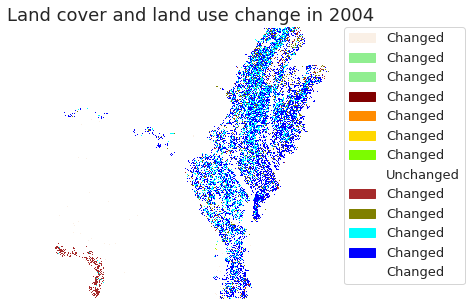

In [ ]:
# Add legend of tree's classes
# Create a list of labels to use for your legend
height_class_labels = ["Changed","Changed","Changed","Changed","Changed","Changed","Changed",
                       "Unchanged","Changed","Changed","Changed","Changed","Changed"]

# Create a colormap from a list of colors
colors = ['linen','lightgreen','darkgreen','maroon',"darkorange", "gold", "lawngreen",'white',
          "brown","olive","cyan","blue"]

cmap = ListedColormap(colors)

class_bins = [-208, -105, -100, -7,-4,-2,-1,0,2,3,6,7,157]
norm = BoundaryNorm(class_bins,
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(5, 5))
im = lcluc_data.plot.imshow(cmap=cmap,
                                        norm=norm,
                                        # Turn off colorbar
                                        add_colorbar=False)
# Add legend using earthpy
ep.draw_legend(im,
               titles=height_class_labels)
ax.set(title="Land cover and land use change in 2004")
ax.set_axis_off()
plt.show()